# Assessment 2



# Task 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

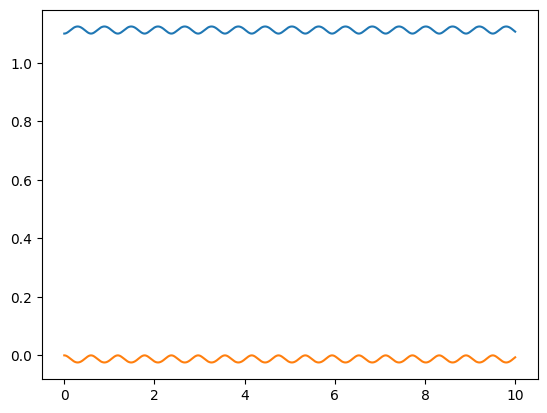

In [15]:
epsilon = 125.7 * 1.38e-23
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

N = 2

def force_coefficient(r):
    return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)

def force_coefficient_2(r):
    return 24 * epsilon / sigma * (-2 * (sigma / r) ** 13 + (sigma / r) ** 7)

pos = np.zeros((N, 3))
pos[0] = np.array([1.1, 0, 0])

vel = np.zeros((N, 3))

acc = np.zeros((N, 3))

dt = 0.001
timesteps = 10000

stored_pos_1 = []
stored_pos_2 = []
stored_pos_3 = []
stored_pos_4 = []
times = []


def calculate_force(pos_p, pos_j):
    r = np.linalg.norm(pos_j - pos_p)
    r_hat = (pos_j - pos_p) / r
    return force_coefficient(r) * r_hat


def calculate_acceleration(pos_p, p):
    acc = np.zeros(3)
    for j in range(N):
        if p != j:
            acc += calculate_force(pos_p, pos[j])
    return acc


for t in range(timesteps):
    times.append(t * dt)
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
    vel += acc * dt * 0.5
    pos += vel * dt
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
    vel += acc * dt * 0.5
    stored_pos_1.append(pos[0][0])
    stored_pos_2.append(pos[1][0])


fig, ax = plt.subplots()

ax.plot(times, stored_pos_1)
ax.plot(times, stored_pos_2)


In [33]:
class Particle:


    def __init__(self, pos, vel):

        self.pos = pos
        self.vel = vel
        self.stored_x = []

In [36]:
class System:


    def __init__(self, particles):

        self.particles = particles
        self.num_particles = len(particles)
        self.times = []
        self.vel = np.zeros((self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))
        for i in range(self.num_particles):
            self.pos[i] = particles[i].pos
            self.vel[i] = particles[i].vel
    

    def force_coefficient(self, r):

        return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)


    def calculate_force(self, pos_p, pos_j):

        r = np.linalg.norm(pos_j - pos_p)
        r_hat = (pos_j - pos_p) / r
        return self.force_coefficient(r) * r_hat


    def calculate_acceleration(self, pos_p, p):

        acc = np.zeros(3)
        for j in range(N):
            if p != j:
                acc += self.calculate_force(pos_p, pos[j])
        return acc


    def run(self, dt, timesteps):

        for t in range(1, timesteps + 1):
            self.times.append(t * dt)

            for p in range(self.num_particles):
                self.acc[p] = self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * dt * 0.5
            self.pos += self.vel * dt

            for p in range(self.num_particles):
                self.acc[p] = self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * dt * 0.5

            for p in range(self.num_particles):
                self.particles[p].stored_x.append(self.pos[p][0])
    

    def plot(self):

        fig, ax = plt.subplots()

        for particle in self.particles:
            ax.plot(self.times, particle.stored_x)
            ax.set_xlabel('Time')
            ax.set_ylabel('X position')


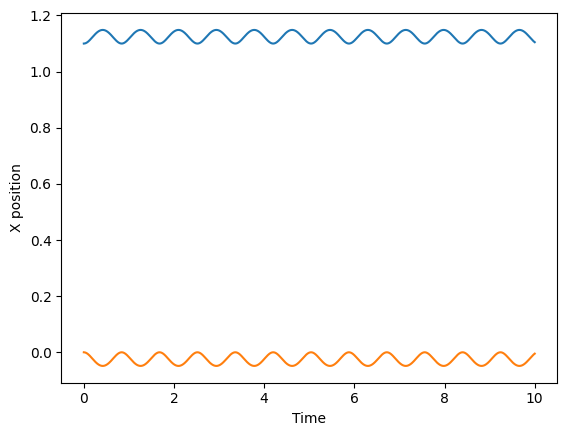

In [37]:
particle_1 = Particle(np.array([1.1, 0, 0]), np.array([0, 0, 0]))
particle_2 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))

particles = [particle_1, particle_2]

system = System(particles)

system.run(0.001, 10000)

system.plot()

In [39]:
epsilon = 125.7 * 1.38e-23
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

print("The characteristic time is:", tau)
print("The characteristic speed is:", sigma / tau)

The characteristic time is: 2.0767506276661695e-12
The characteristic speed is: 161.06892928974702


# Task 2

In [42]:
class Particle:


    def __init__(self, pos, vel):

        self.pos = pos
        self.vel = vel

In [93]:
class System:


    def __init__(self, particles, box_length, num_steps, dt):

        self.particles = particles
        self.num_particles = len(particles)

        self.dt = dt
        self.num_steps = num_steps

        self.box_length = box_length
        self.stored_pos = np.zeros((num_steps, self.num_particles, 3))
        
        self.times = []
        self.vel = np.zeros((self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))

        for i in range(self.num_particles):
            self.pos[i] = particles[i].pos
            self.vel[i] = particles[i].vel
    

    def force_coefficient(self, r):

        return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)


    def calculate_force(self, pos_p, pos_j):

        r = np.linalg.norm(pos_j - pos_p)
        r_hat = (pos_j - pos_p) / r
        return self.force_coefficient(r) * r_hat


    def calculate_acceleration(self, pos_p, p):

        self.acc[p] = np.zeros(3)
        for j in range(N):
            if p != j:
                self.acc[p] += self.calculate_force(pos_p, pos[j])


    def run(self):

        for t in range(self.num_steps):
            self.times.append(t * self.dt)

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5
            self.pos += self.vel * self.dt

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5
            self.vel = np.where(self.pos >= self.box_length / 2, -self.vel, self.vel)
            print(self.pos)
            
            for p in range(self.num_particles):
                self.stored_pos[t][p] = self.pos[p]
    

    def plot(self):
        
        """
        fig, ax = plt.subplots()

        for particle in self.particles:
            ax.plot(self.times, particle.stored_x)
            ax.plot(self.times, particle.stored_y)
            ax.plot(self.times, particle.stored_z)
        
        ax.set_xlabel('Time')
        ax.set_ylabel('Position')
        """
        
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for i in range(self.num_particles):
            x = self.stored_pos[:, i, 0]
            y = self.stored_pos[:, i, 1]
            z = self.stored_pos[:, i, 2]
            ax.plot(x, y, z, label=f"Particle {i + 1}")

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_xlim(-self.box_length / 2, self.box_length / 2)
        ax.set_ylim(-self.box_length / 2, self.box_length / 2)
        ax.set_zlim(-self.box_length / 2, self.box_length / 2)
        ax.legend()
        

[[ 1.09999955e+00  9.99999590e-01  0.00000000e+00]
 [ 6.70384056e-09 -1.19999999e+00  1.99999999e+00]]
[[ 1.09999820e+00  9.99998361e-01  0.00000000e+00]
 [ 2.68153628e-08 -1.19999997e+00  2.00000000e+00]]
[[ 1.09999594e+00  9.99996311e-01  0.00000000e+00]
 [ 6.03345668e-08 -1.19999993e+00  1.99999999e+00]]
[[ 1.09999279e+00  9.99993443e-01  0.00000000e+00]
 [ 1.07261454e-07 -1.19999988e+00  2.00000000e+00]]
[[ 1.09998873e+00  9.99989754e-01  0.00000000e+00]
 [ 1.67596025e-07 -1.19999982e+00  1.99999999e+00]]
[[ 1.09998377e+00  9.99985246e-01  0.00000000e+00]
 [ 2.41338282e-07 -1.19999974e+00  2.00000000e+00]]
[[ 1.09997791e+00  9.99979917e-01  0.00000000e+00]
 [ 3.28488227e-07 -1.19999964e+00  1.99999999e+00]]
[[ 1.09997115e+00  9.99973770e-01  0.00000000e+00]
 [ 4.29045861e-07 -1.19999953e+00  2.00000000e+00]]
[[ 1.09996348e+00  9.99966802e-01  0.00000000e+00]
 [ 5.43011189e-07 -1.19999941e+00  1.99999999e+00]]
[[ 1.09995492e+00  9.99959014e-01  0.00000000e+00]
 [ 6.70384212e-07 -1.1

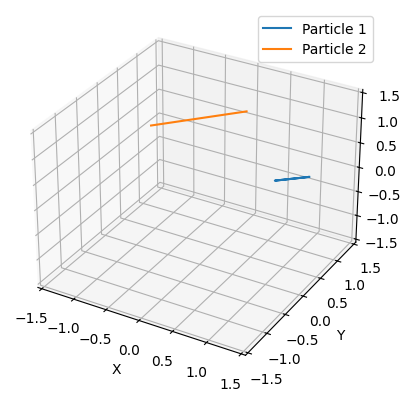

In [94]:
particle_1 = Particle(np.array([1.1, 1, 0]), np.array([0, 0, 0]))
particle_2 = Particle(np.array([0, -1.2, 2.0]), np.array([0, 0, 0]))

particles = [particle_1, particle_2]

L = 3

system = System(particles, L, 10000, 0.001)

system.run()

system.plot()